corrected_agar1000nM017.tif: 1743 Regionen gefunden.


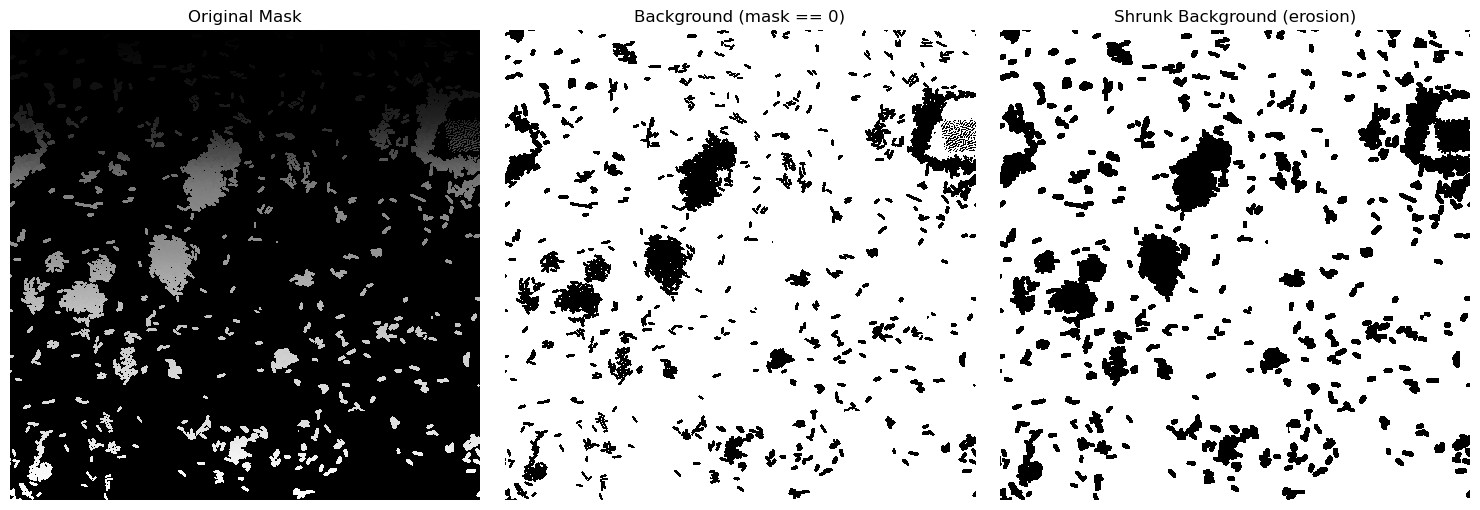

background for corrected_agar1000nM017.tif is 112.0
Heatmap + bin vectors saved for agar1000nM017
Polar plot saved to histogram_data/agar1000nM017_polar_heatmap.png
corrected_agar1000nM018.tif: 2454 Regionen gefunden.


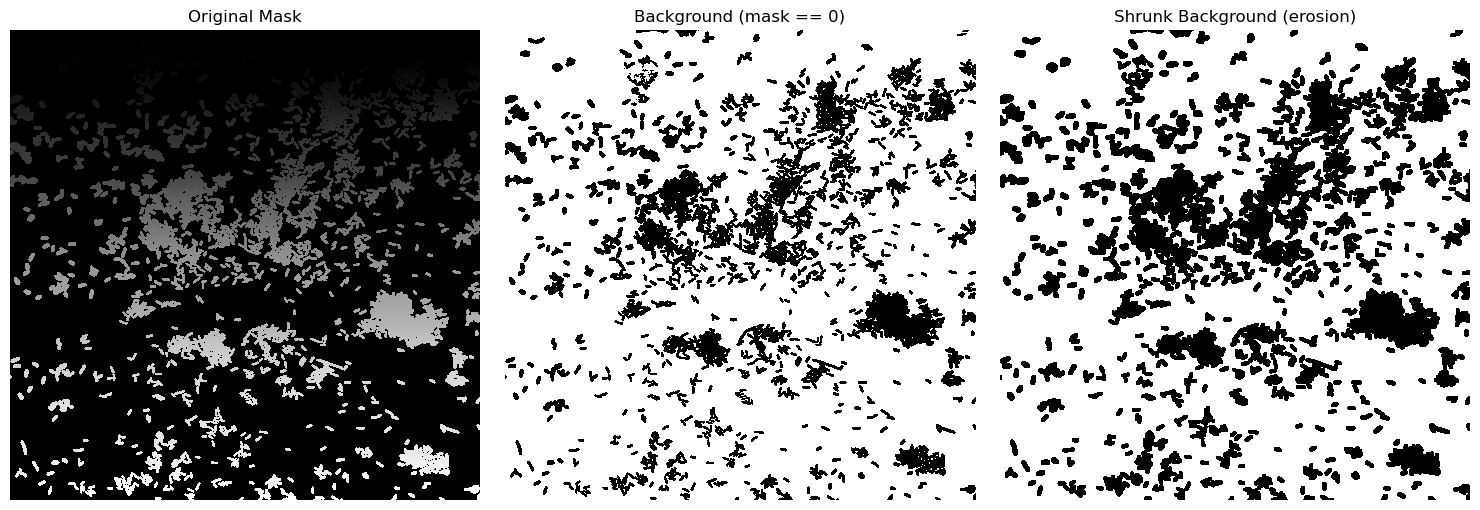

background for corrected_agar1000nM018.tif is 117.0
Heatmap + bin vectors saved for agar1000nM018
Polar plot saved to histogram_data/agar1000nM018_polar_heatmap.png
corrected_agar1000nM019.tif: 1286 Regionen gefunden.


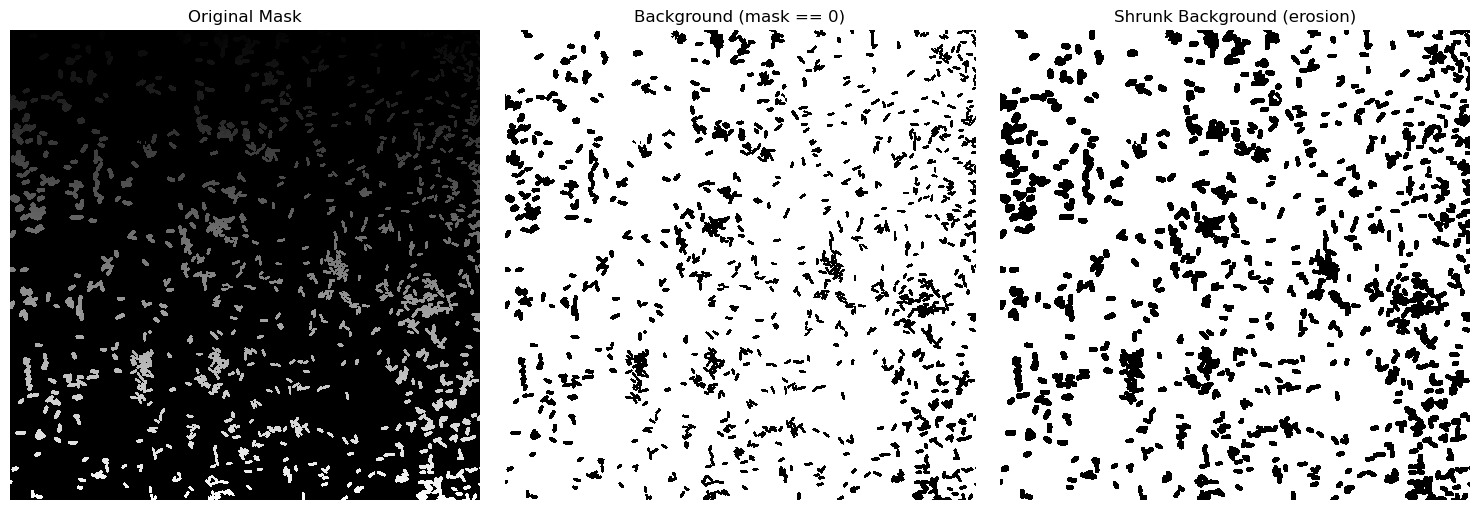

background for corrected_agar1000nM019.tif is 113.0
Heatmap + bin vectors saved for agar1000nM019
Polar plot saved to histogram_data/agar1000nM019_polar_heatmap.png
corrected_agar1000nM020.tif: 1091 Regionen gefunden.


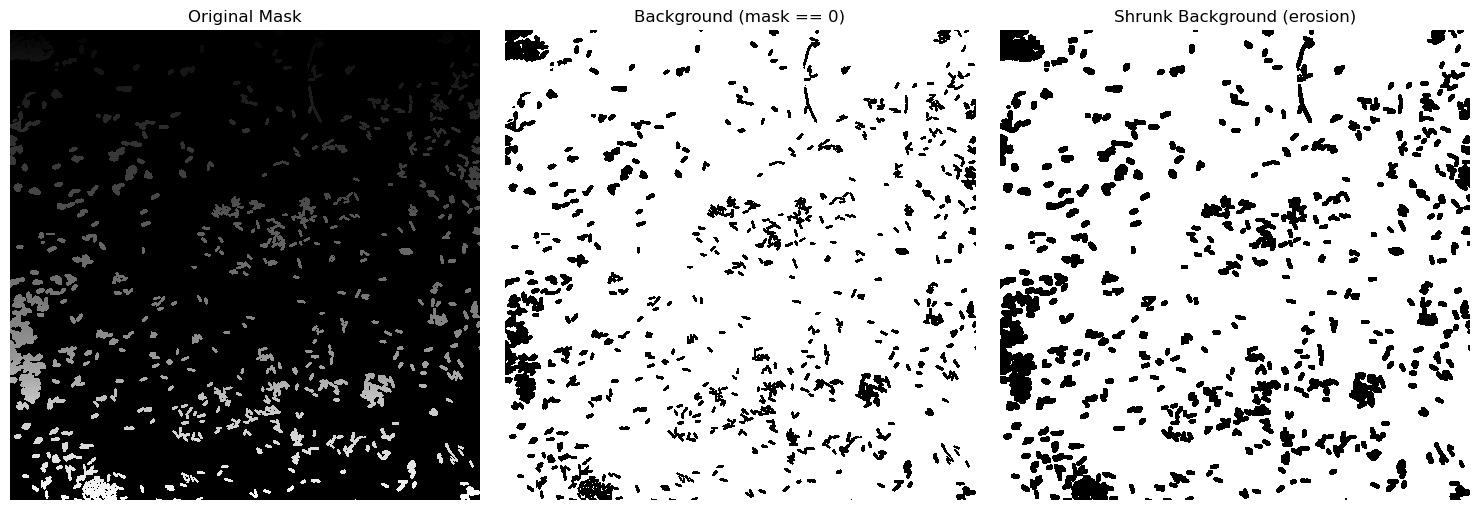

background for corrected_agar1000nM020.tif is 110.0
Heatmap + bin vectors saved for agar1000nM020
Polar plot saved to histogram_data/agar1000nM020_polar_heatmap.png
corrected_chamber1µM004.tif: 775 Regionen gefunden.


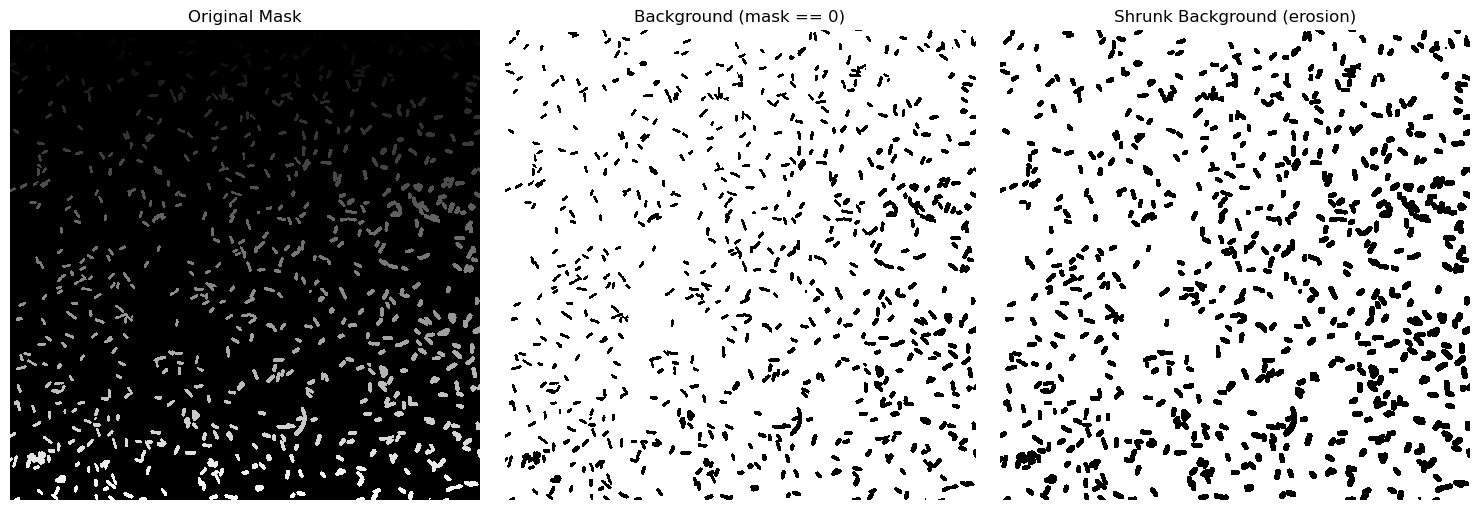

background for corrected_chamber1µM004.tif is 186.0
Heatmap + bin vectors saved for chamber1µM004
Polar plot saved to histogram_data/chamber1µM004_polar_heatmap.png
corrected_chamber1µM005.tif: 241 Regionen gefunden.


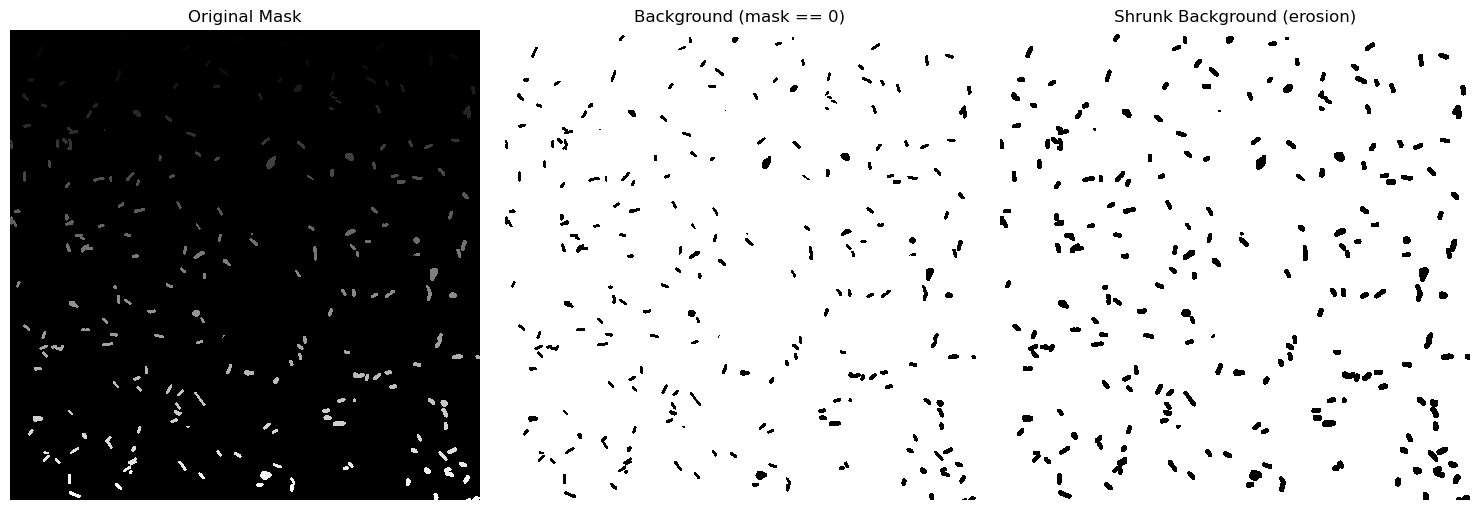

background for corrected_chamber1µM005.tif is 175.0
Heatmap + bin vectors saved for chamber1µM005
Polar plot saved to histogram_data/chamber1µM005_polar_heatmap.png
corrected_chamber1µM006.tif: 205 Regionen gefunden.


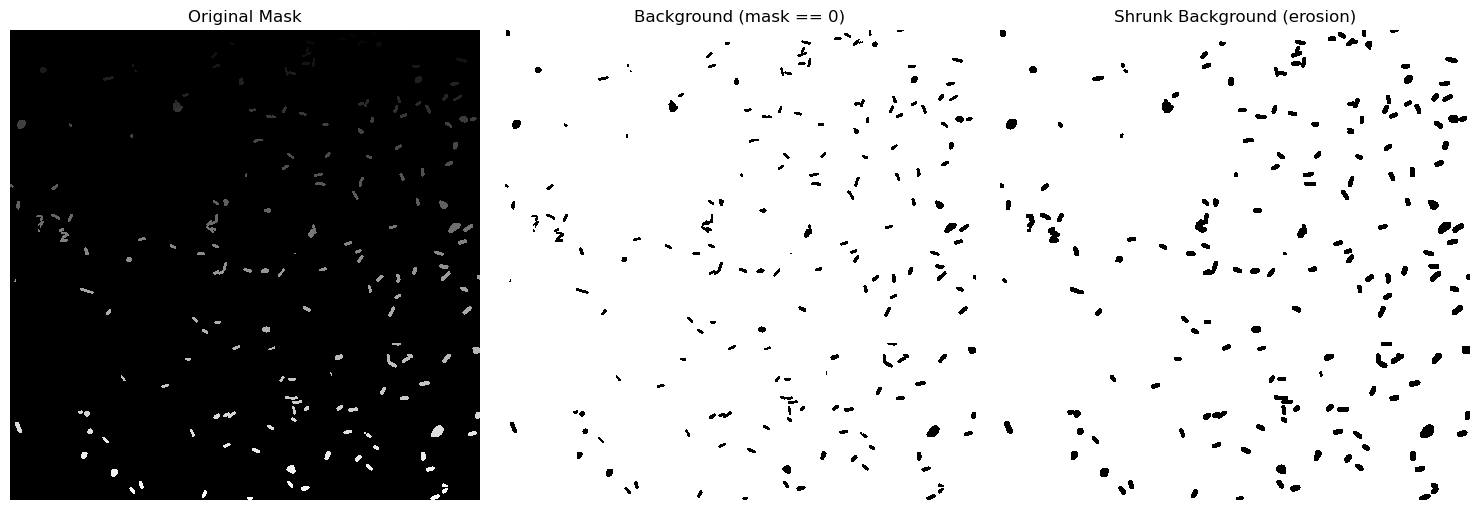

background for corrected_chamber1µM006.tif is 173.0
Heatmap + bin vectors saved for chamber1µM006
Polar plot saved to histogram_data/chamber1µM006_polar_heatmap.png
corrected_F2F_100ms_1%621_001.tif: 2281 Regionen gefunden.


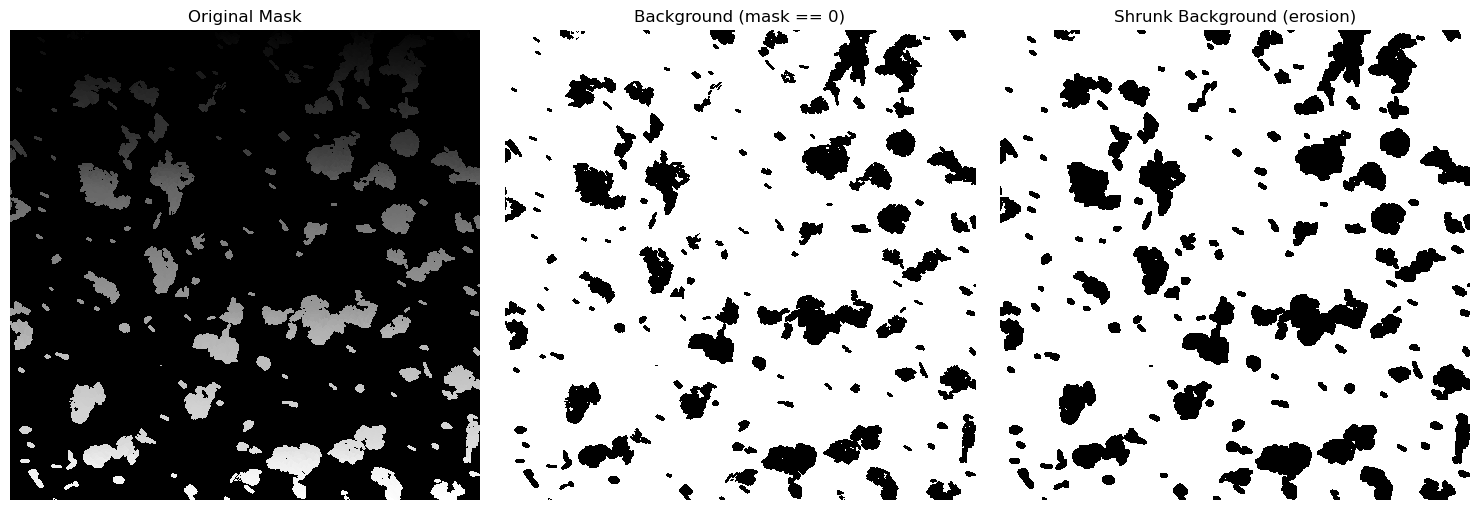

background for corrected_F2F_100ms_1%621_001.tif is 104.0
Heatmap + bin vectors saved for F2F_100ms_1%621_001
Polar plot saved to histogram_data/F2F_100ms_1%621_001_polar_heatmap.png
corrected_F2F_100ms_1%621_002.tif: 2808 Regionen gefunden.


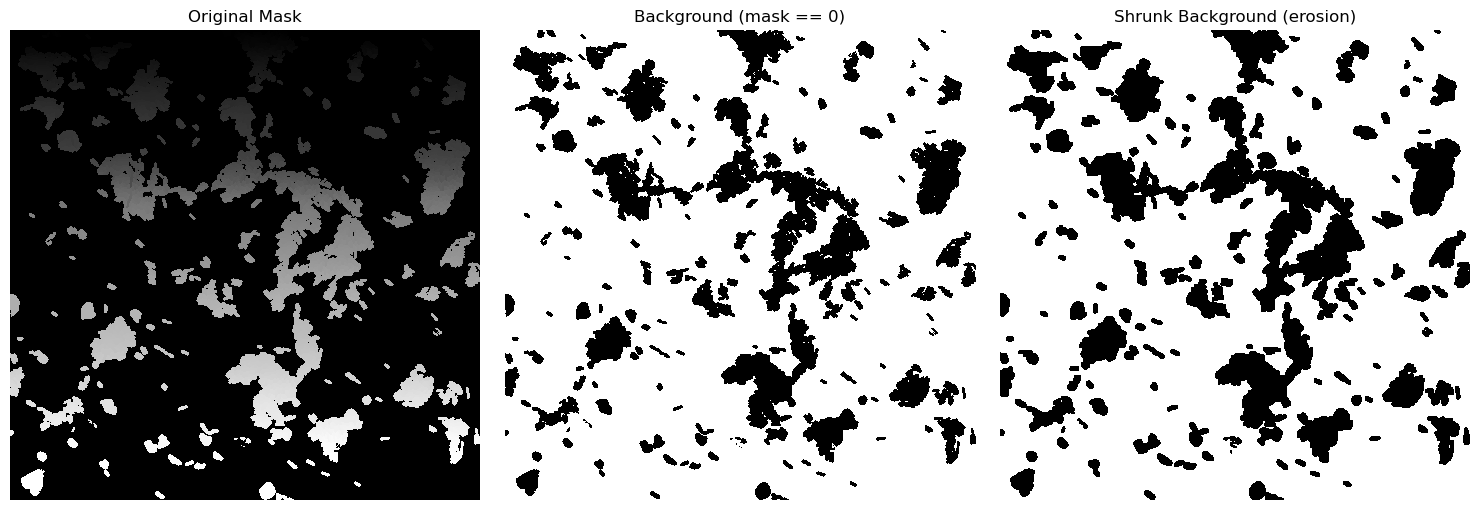

background for corrected_F2F_100ms_1%621_002.tif is 105.0
Heatmap + bin vectors saved for F2F_100ms_1%621_002
Polar plot saved to histogram_data/F2F_100ms_1%621_002_polar_heatmap.png
corrected_F2F_100ms_1%621_003.tif: 2725 Regionen gefunden.


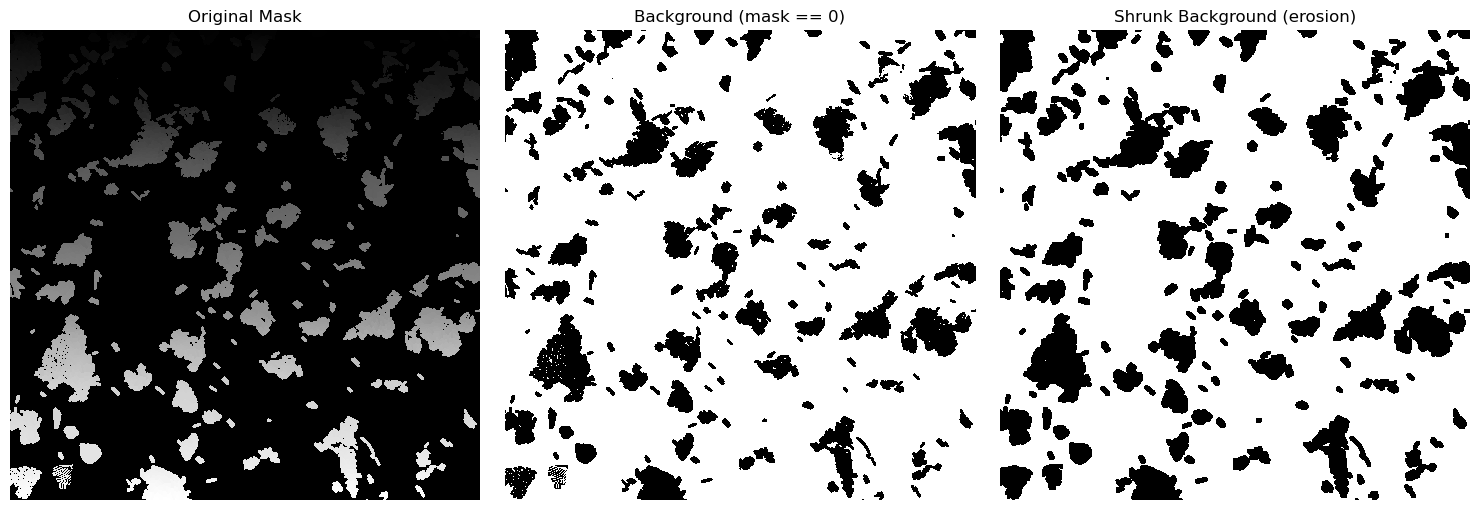

background for corrected_F2F_100ms_1%621_003.tif is 106.0
Heatmap + bin vectors saved for F2F_100ms_1%621_003
Polar plot saved to histogram_data/F2F_100ms_1%621_003_polar_heatmap.png
corrected_FN_100ms_1%621_004.tif: 535 Regionen gefunden.


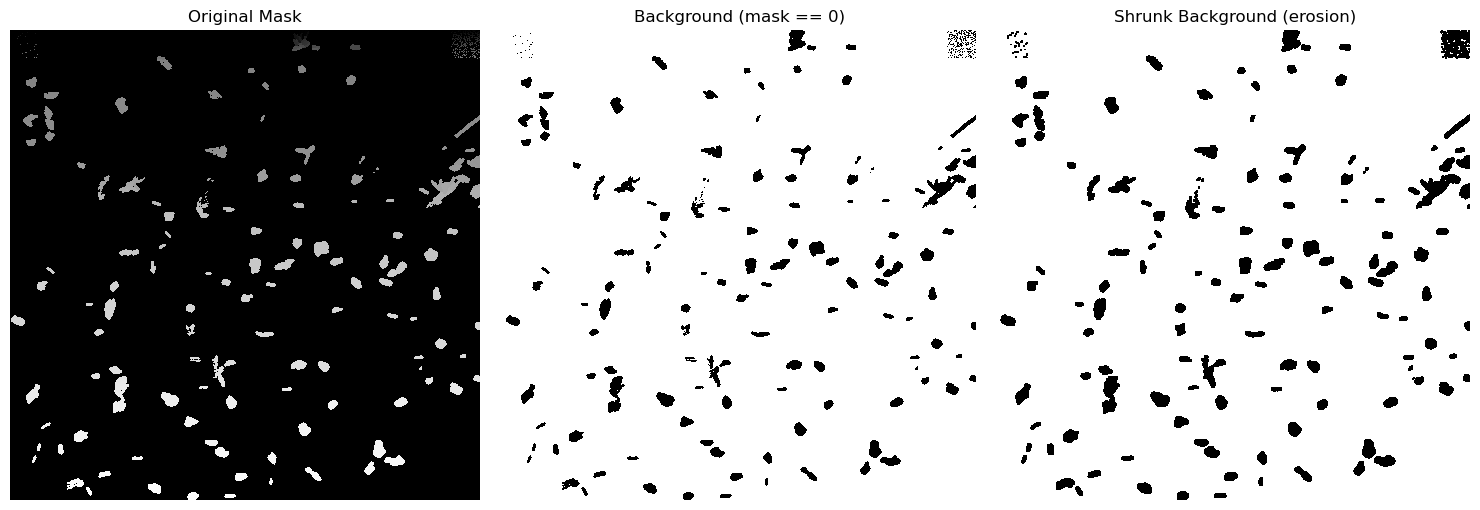

background for corrected_FN_100ms_1%621_004.tif is 102.0
Heatmap + bin vectors saved for FN_100ms_1%621_004
Polar plot saved to histogram_data/FN_100ms_1%621_004_polar_heatmap.png
corrected_FN_100ms_1%621_005.tif: 937 Regionen gefunden.


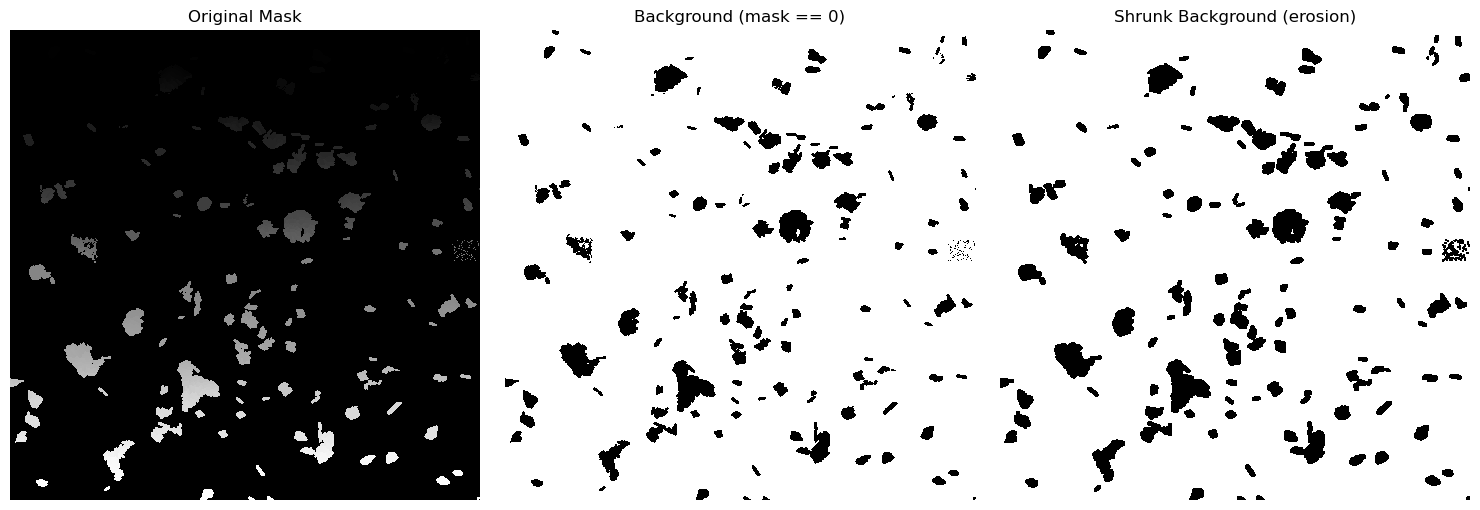

background for corrected_FN_100ms_1%621_005.tif is 102.0
Heatmap + bin vectors saved for FN_100ms_1%621_005
Polar plot saved to histogram_data/FN_100ms_1%621_005_polar_heatmap.png
corrected_FN_100ms_1%621_006.tif: 1084 Regionen gefunden.


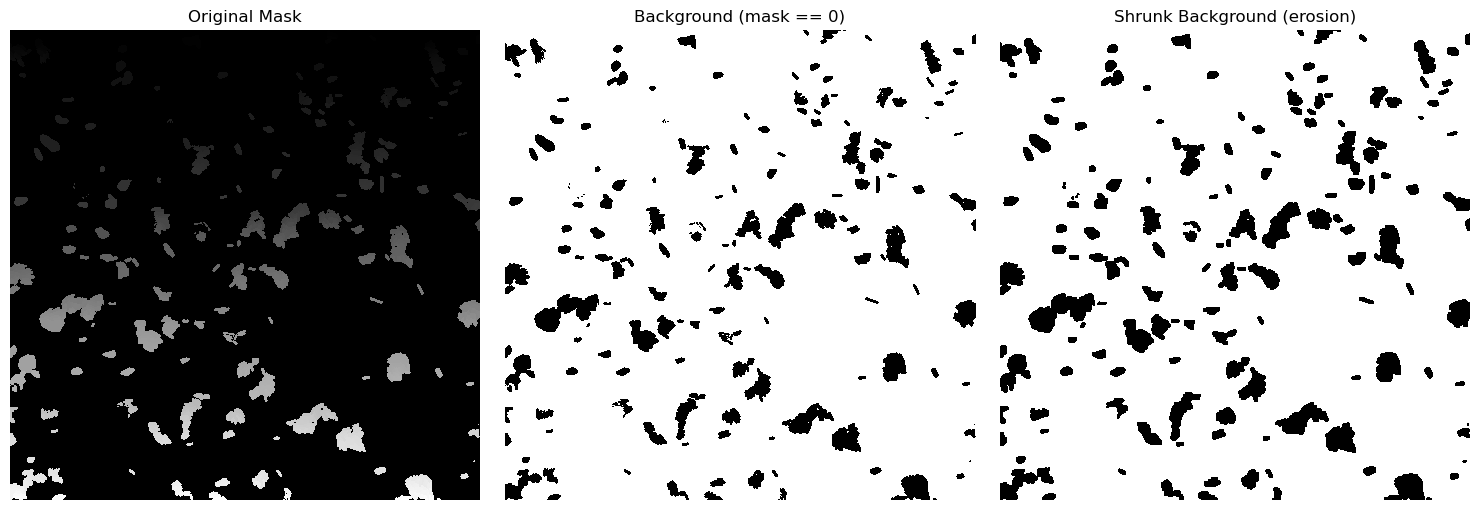

background for corrected_FN_100ms_1%621_006.tif is 103.0
Heatmap + bin vectors saved for FN_100ms_1%621_006
Polar plot saved to histogram_data/FN_100ms_1%621_006_polar_heatmap.png
corrected_FS_100ms_1%621_010.tif: 1932 Regionen gefunden.


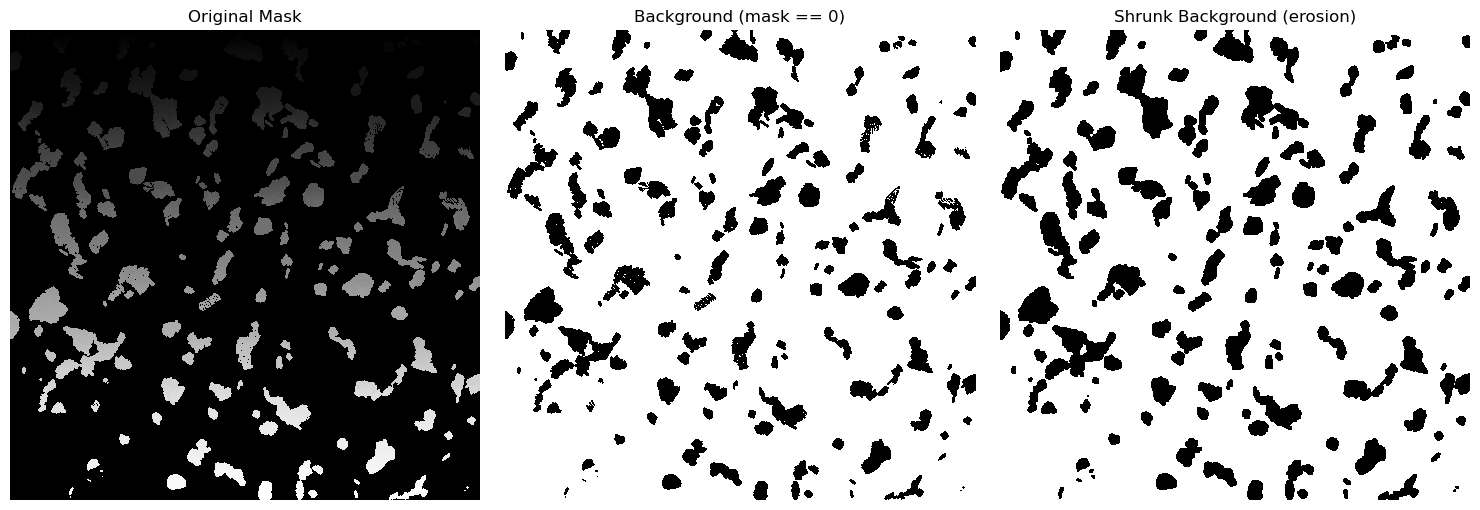

background for corrected_FS_100ms_1%621_010.tif is 105.0
Heatmap + bin vectors saved for FS_100ms_1%621_010
Polar plot saved to histogram_data/FS_100ms_1%621_010_polar_heatmap.png
corrected_FS_100ms_1%621_011.tif: 1529 Regionen gefunden.


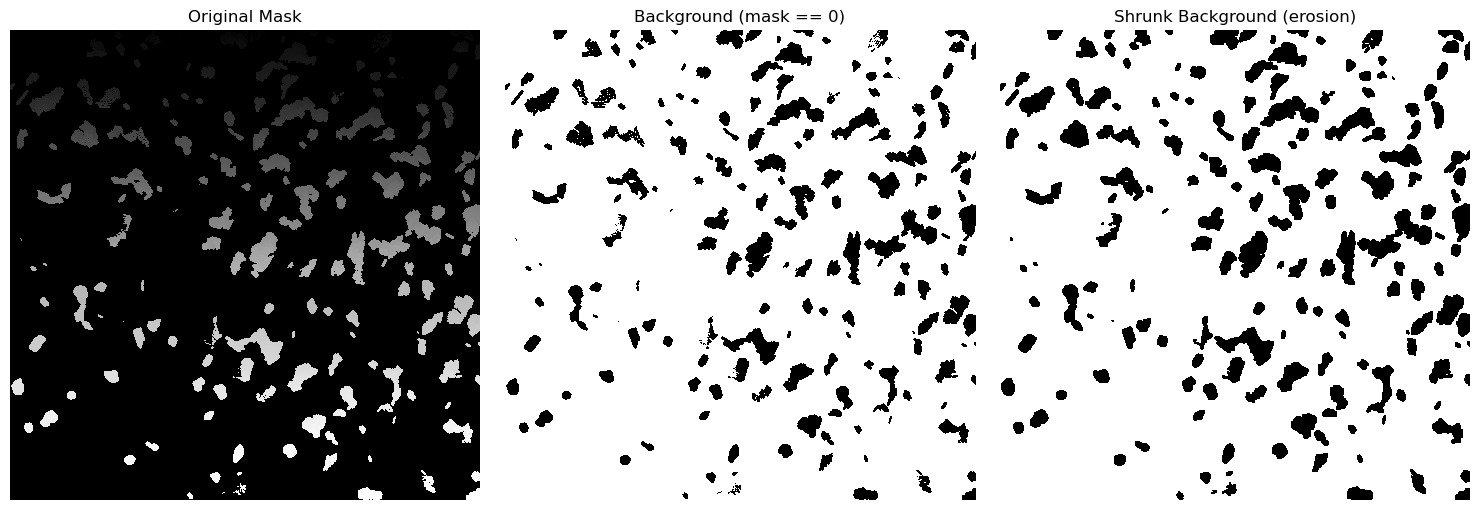

background for corrected_FS_100ms_1%621_011.tif is 106.0
Heatmap + bin vectors saved for FS_100ms_1%621_011
Polar plot saved to histogram_data/FS_100ms_1%621_011_polar_heatmap.png
corrected_FS_100ms_1%621_012.tif: 234 Regionen gefunden.


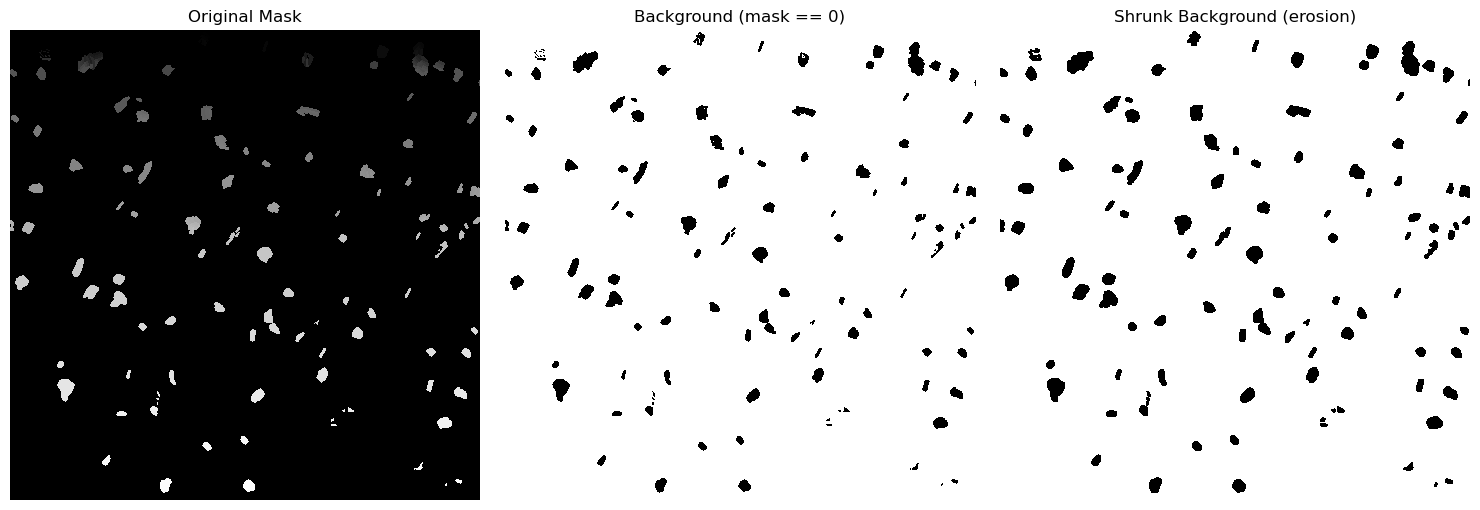

background for corrected_FS_100ms_1%621_012.tif is 102.0
Heatmap + bin vectors saved for FS_100ms_1%621_012
Polar plot saved to histogram_data/FS_100ms_1%621_012_polar_heatmap.png


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.measure
from skimage.morphology import erosion, square
from scipy.stats import skew

# === Parameters ===
images_folder = "fluo_corrected"   # Folder with TIFF images
masks_folder = "masks"             # Folder with mask images
output_folder = "histogram_data"   # Where stats + plots will be stored

num_angle_bins = 90    # angular resolution of polar heatmap
num_radius_bins = 50   # radial resolution of polar heatmap

# Ensure output dir exists
os.makedirs(output_folder, exist_ok=True)

# Gather image files
image_files = [f for f in os.listdir(images_folder) if f.lower().endswith('.tif')]
if not image_files:
    print("Keine TIFF-Dateien im Ordner gefunden.")
    sys.exit(1)

for image_file in image_files:
    # ---- Derive base name ----
    base_name = image_file
    if base_name.startswith("corrected_"):
        base_name = base_name[len("corrected_"):]
    base_name = os.path.splitext(base_name)[0]

    # ---- Get mask path ----
    mask_file = base_name + "_cp_masks.tif"
    mask_path = os.path.join(masks_folder, mask_file)
    if not os.path.isfile(mask_path):
        print(f"Warnung: Maske {mask_path} nicht gefunden für Bild {image_file}. Überspringe.")
        continue
   

    # ---- Load image + mask ----
    image_path = os.path.join(images_folder, image_file)
    image = skimage.io.imread(image_path)
    mask = skimage.io.imread(mask_path)
    
    intensity_image = image  # assuming grayscale or single channel

    # ---- Region props ----
    regions = skimage.measure.regionprops(mask, intensity_image=intensity_image)
    if not regions:
        print(f"Keine ROIs in Maske {mask_file} gefunden.")
        continue

    
    print(f"{image_file}: {len(regions)} Regionen gefunden.")
    
    #background mask for subtraction 
    background=(mask == 0)
    background_shrunk = erosion(background, square(10))
    background_median = np.median(intensity_image[background_shrunk])
    #looking at the masks 
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(mask,     cmap='gray', interpolation='nearest')
    axes[0].set_title('Original Mask')
    axes[0].axis('off')

    axes[1].imshow(background, cmap='gray', interpolation='nearest')
    axes[1].set_title('Background (mask == 0)')
    axes[1].axis('off')

    axes[2].imshow(background_shrunk, cmap='gray', interpolation='nearest')
    axes[2].set_title('Shrunk Background (erosion)')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()
    
    print(f"background for {image_file} is {background_median}")
    # ---- Compute stats ---- CORRECT HERE IF MEAN IS NEEDED RN ITS MEDIAN AND MEDIAN IS BACKGROUND CORRECTED
    medians = [(np.median(intensity_image[r.coords[:, 0], r.coords[:, 1]])-background_median) for r in regions]
    means = [np.median(intensity_image[r.coords[:, 0], r.coords[:, 1]]) for r in regions]
    skews = [skew(intensity_image[r.coords[:, 0], r.coords[:, 1]], bias=False) for r in regions]

    np.savetxt(os.path.join(output_folder, base_name + "_median_intensities.txt"), means, fmt="%.6f")
    np.savetxt(os.path.join(output_folder, base_name + "_median_corrected_intensities.txt"), medians, fmt="%.6f")
    np.savetxt(os.path.join(output_folder, base_name + "_skewness.txt"), skews, fmt="%.6f")

    # ---- Polar heatmap arrays ----
    heatmap = np.zeros((num_radius_bins, num_angle_bins))
    counts = np.zeros_like(heatmap)

    for r in regions:
        cy, cx = r.centroid
        coords = r.coords
        y, x = coords[:, 0], coords[:, 1]

        dy = y - cy
        dx = x - cx

        # Polar coordinates
        radii = np.sqrt(dx**2 + dy**2)
        angles = np.arctan2(dy, dx)
        angles[angles < 0] += 2 * np.pi

        # Normalize radius by ROI max
        r_norm = radii / radii.max()
        vals = intensity_image[y, x]

        # Bin each pixel
        r_idx = np.floor(r_norm * (num_radius_bins - 1)).astype(int)
        a_idx = np.floor(angles / (2 * np.pi) * num_angle_bins).astype(int)

        for ri, ai, val in zip(r_idx, a_idx, vals):
            heatmap[ri, ai] += val
            counts[ri, ai] += 1

    # ---- Mean intensity per bin ----
    with np.errstate(invalid='ignore'):
        heatmap = np.divide(heatmap, counts, where=counts > 0)

    # ---- Save numeric heatmap to TXT ----
    txt_path = os.path.join(output_folder, base_name + "_polar_heatmap.txt")
    np.savetxt(txt_path, heatmap, delimiter='\t', fmt='%.6f')

    # Also save bin center vectors for external plotting
    radii_vec = np.linspace(0, 1, num_radius_bins)
    angles_vec = np.linspace(0, 360, num_angle_bins, endpoint=False)
    np.savetxt(os.path.join(output_folder, base_name + "_radii_bins.txt"), radii_vec, fmt="%.6f")
    np.savetxt(os.path.join(output_folder, base_name + "_angle_bins_deg.txt"), angles_vec, fmt="%.6f")

    print(f"Heatmap + bin vectors saved for {base_name}")

    # ---- Plot polar heatmap ----
    theta = np.deg2rad(angles_vec)
    R, T = np.meshgrid(radii_vec, theta, indexing='ij')

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='polar')
    c = ax.pcolormesh(T, R, heatmap, shading='auto', cmap='viridis')
    fig.colorbar(c, ax=ax, label='Mean intensity')
    ax.set_title(f"Direction-aware radial profile\n{base_name}", va='bottom')

    plot_path = os.path.join(output_folder, base_name + "_polar_heatmap.png")
    plt.savefig(plot_path, dpi=150, bbox_inches='tight')
    plt.close(fig)

    print(f"Polar plot saved to {plot_path}")
